# 想想看，你能做那些改進來提升正確率 (accuracy) ？
1. 修改epoch和batch size
2. 修改layer數
3. 修改optimizer 
4. 修改loss function
5. 修改activate function
6. 用network.fit()來進行訓練
7. 用network.evaluate()評估成果

## MINIST 資料集圖片辨識
深度學習的「Hello World!」
1. 載入mnist資料集，含(train_images,train_labels)和(test_images,test_labels)
2. 用兩個Dense層架構(network.add())了一個神經網路
3. 用network.compile()來編譯神經網路，此時要指定optimmizer、loss、metrices三個參數
4.要將輸入資料集做前處理，用reshape()和astype()來做 
5. 對輸入的標籤做分類標碼
6. 用network.fit()來進行訓練
7. 用network.evaluate()評估成果

In [1]:
# 在Keras中載入MNIST資料集
from tensorflow.keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [2]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
x= test_images[1]
#%%
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()
# 11612517125525515093

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0116125171255255150 93  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0169253253253253253253218 30  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0169253253253213142176253253122  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 52250253210 32 12  0  6206253140  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 77251210 25  0  0  0122248253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 31 18  0  0  0  0209253253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0117247253198 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 76247253231 63  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0128253253144  0  0  0  0  0  

In [4]:
a=[112,255555,1]
for i in range(len(a)):
    print(f'{a[i]:10d}',end='')

       112    255555         1

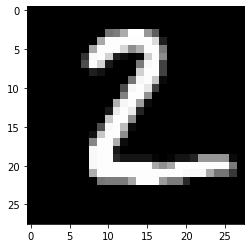

In [5]:
import matplotlib.pyplot as pl
pl.imshow(x)
pl.imshow(x,cmap='gray')

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))


In [13]:
network.compile(
    optimizer = 'adam', # 指定優化器→控制梯度下降的確切規則
    loss = 'categorical_crossentropy', # 指定損失函數
    metrics = ['accuracy'] # 指定評量準則
)

In [8]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/ 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/ 255

# 建模

In [9]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# ACC 100% 在training set


In [14]:
network.fit(train_images,train_labels,epochs=16,batch_size=128)

Epoch 1/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9985
Epoch 2/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9972
Epoch 3/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0038 - accuracy: 0.9988
Epoch 4/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 5/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0039 - accuracy: 0.9989
Epoch 6/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 0.9992
Epoch 7/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0068 - accuracy: 0.9977
Epoch 8/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9984
Epoch 9/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 10/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0046 - accuracy: 0.9987

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


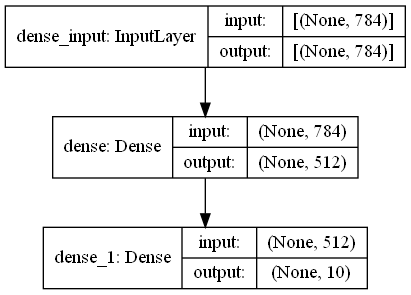

In [15]:
from tensorflow.keras.utils import plot_model
network.summary()

plot_model(network, 
    show_shapes= True,
)


In [16]:
test_loss , test_acc = network.evaluate(test_images,test_labels)
print('test_acc:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9851
test_acc: 0.9850999712944031
